In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

np.random.seed(0)
np.set_printoptions(suppress=True)

### Load 311 Dataset

In [2]:
df = pd.read_csv("3112020.csv")

In [3]:
df

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-09-02T11:44:13.000,47447080,PLUMBING,10030.0,125 WEST 133 STREET,WEST 133 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.813310,-73.942957,NaN,RESIDENTIAL BUILDING,Open
1,2020-09-02T13:37:54.000,47447334,PLUMBING,11354.0,147-19 ROOSEVELT AVENUE,ROOSEVELT AVENUE,ADDRESS,Flushing,The following complaint conditions are still o...,QUEENS,40.762669,-73.818237,NaN,RESIDENTIAL BUILDING,Open
2,2020-09-02T14:33:04.000,47446567,HEAT/HOT WATER,10462.0,2160 BOLTON STREET,BOLTON STREET,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.855246,-73.868664,NaN,RESIDENTIAL BUILDING,Open
3,2020-09-02T12:48:55.000,47446283,UNSANITARY CONDITION,10459.0,975 SIMPSON STREET,SIMPSON STREET,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.821509,-73.892870,NaN,RESIDENTIAL BUILDING,Open
4,2020-09-02T00:26:52.000,47447101,WATER LEAK,10002.0,259 EAST BROADWAY,EAST BROADWAY,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.714441,-73.985463,NaN,RESIDENTIAL BUILDING,Open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6194957,2019-03-25T19:59:20.000,42053346,PAINT/PLASTER,11415.0,118-65 METROPOLITAN AVENUE,METROPOLITAN AVENUE,ADDRESS,Kew Gardens,The Department of Housing Preservation and Dev...,QUEENS,40.706562,-73.833153,2019-04-05T10:43:09.000,RESIDENTIAL BUILDING,Closed
6194958,2019-03-25T15:15:38.000,42053338,PAINT/PLASTER,11105.0,23-60 29 STREET,29 STREET,ADDRESS,Astoria,The Department of Housing Preservation and Dev...,QUEENS,40.773720,-73.915508,2019-03-28T11:03:54.000,RESIDENTIAL BUILDING,Closed
6194959,2019-03-25T19:35:11.000,42053305,HEAT/HOT WATER,10461.0,2935 WILKINSON AVENUE,WILKINSON AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.851678,-73.830703,2019-03-27T02:07:56.000,RESIDENTIAL BUILDING,Closed
6194960,2019-03-25T22:32:09.000,42053288,HEAT/HOT WATER,10463.0,2834 HEATH AVENUE,HEATH AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.873509,-73.904071,2019-03-28T02:07:44.000,RESIDENTIAL BUILDING,Closed


In [4]:
df.columns

Index(['created_date', 'unique_key', 'complaint_type', 'incident_zip',
       'incident_address', 'street_name', 'address_type', 'city',
       'resolution_description', 'borough', 'latitude', 'longitude',
       'closed_date', 'location_type', 'status'],
      dtype='object')

In [5]:
df["street_name"].nunique()

6709

In [6]:
df["incident_address"].nunique()

174235

In [7]:
df["incident_zip"].nunique()

205

In [8]:
df["borough"].nunique()

6

In [9]:
df["city"].nunique()

89

In [10]:
df.drop(['unique_key','address_type','city','resolution_description',
        'latitude','longitude','closed_date','location_type','status'],axis=1,inplace=True)

In [11]:
df

,created_date,complaint_type,incident_zip,incident_address,street_name,borough
0,2020-09-02T11:44:13.000,PLUMBING,10030.0,125 WEST 133 STREET,WEST 133 STREET,MANHATTAN
1,2020-09-02T13:37:54.000,PLUMBING,11354.0,147-19 ROOSEVELT AVENUE,ROOSEVELT AVENUE,QUEENS
2,2020-09-02T14:33:04.000,HEAT/HOT WATER,10462.0,2160 BOLTON STREET,BOLTON STREET,BRONX
3,2020-09-02T12:48:55.000,UNSANITARY CONDITION,10459.0,975 SIMPSON STREET,SIMPSON STREET,BRONX
4,2020-09-02T00:26:52.000,WATER LEAK,10002.0,259 EAST BROADWAY,EAST BROADWAY,MANHATTAN
...,...,...,...,...,...,...
6194957,2019-03-25T19:59:20.000,PAINT/PLASTER,11415.0,118-65 METROPOLITAN AVENUE,METROPOLITAN AVENUE,QUEENS
6194958,2019-03-25T15:15:38.000,PAINT/PLASTER,11105.0,23-60 29 STREET,29 STREET,QUEENS
6194959,2019-03-25T19:35:11.000,HEAT/HOT WATER,10461.0,2935 WILKINSON AVENUE,WILKINSON AVENUE,BRONX
6194960,2019-03-25T22:32:09.000,HEAT/HOT WATER,10463.0,2834 HEATH AVENUE,HEATH AVENUE,BRONX


In [12]:
#df.to_csv("3112020mod.csv",index=False)

In [13]:
df["complaint_type"].value_counts()

HEAT/HOT WATER            1321504
HEATING                    887869
PLUMBING                   728717
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       480885
PAINT - PLASTER            361257
PAINT/PLASTER              360412
ELECTRIC                   316229
NONCONST                   260890
DOOR/WINDOW                215949
WATER LEAK                 203737
GENERAL                    159851
FLOORING/STAIRS            143327
APPLIANCE                  119310
SAFETY                      54319
HPD Literature Request      52830
OUTSIDE BUILDING             7404
ELEVATOR                     7389
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Electric                        1
Mold          

In [14]:
df['complaint_type'] = df['complaint_type'].replace(to_replace="HEATING", value="HEAT/HOT WATER")

In [15]:
df["complaint_type"].value_counts()

HEAT/HOT WATER            2209373
PLUMBING                   728717
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       480885
PAINT - PLASTER            361257
PAINT/PLASTER              360412
ELECTRIC                   316229
NONCONST                   260890
DOOR/WINDOW                215949
WATER LEAK                 203737
GENERAL                    159851
FLOORING/STAIRS            143327
APPLIANCE                  119310
SAFETY                      54319
HPD Literature Request      52830
OUTSIDE BUILDING             7404
ELEVATOR                     7389
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Mold                            1
Electric                        1
Name: complain

In [16]:
#df.to_csv("3112020mod.csv",index=False)

In [17]:
df2 = df[df['complaint_type'] == "HEAT/HOT WATER"]

In [18]:
df2

,created_date,complaint_type,incident_zip,incident_address,street_name,borough
2,2020-09-02T14:33:04.000,HEAT/HOT WATER,10462.0,2160 BOLTON STREET,BOLTON STREET,BRONX
24,2020-09-02T08:51:15.000,HEAT/HOT WATER,11213.0,1710 CARROLL STREET,CARROLL STREET,BROOKLYN
37,2020-09-02T19:38:34.000,HEAT/HOT WATER,10467.0,716 EAST 216 STREET,EAST 216 STREET,BRONX
40,2020-09-02T12:50:54.000,HEAT/HOT WATER,11385.0,61-20 MADISON STREET,MADISON STREET,QUEENS
77,2020-09-02T06:56:33.000,HEAT/HOT WATER,11208.0,902 LIBERTY AVENUE,LIBERTY AVENUE,BROOKLYN
...,...,...,...,...,...,...
6194951,2019-03-25T16:44:13.000,HEAT/HOT WATER,10469.0,3478 FENTON AVENUE,FENTON AVENUE,BRONX
6194952,2019-03-25T14:45:10.000,HEAT/HOT WATER,10462.0,2132 WALLACE AVENUE,WALLACE AVENUE,BRONX
6194956,2019-03-25T06:27:04.000,HEAT/HOT WATER,11225.0,486 BROOKLYN AVENUE,BROOKLYN AVENUE,BROOKLYN
6194959,2019-03-25T19:35:11.000,HEAT/HOT WATER,10461.0,2935 WILKINSON AVENUE,WILKINSON AVENUE,BRONX


In [19]:
df2.reset_index(drop=True, inplace=True)

In [20]:
df2

,created_date,complaint_type,incident_zip,incident_address,street_name,borough
0,2020-09-02T14:33:04.000,HEAT/HOT WATER,10462.0,2160 BOLTON STREET,BOLTON STREET,BRONX
1,2020-09-02T08:51:15.000,HEAT/HOT WATER,11213.0,1710 CARROLL STREET,CARROLL STREET,BROOKLYN
2,2020-09-02T19:38:34.000,HEAT/HOT WATER,10467.0,716 EAST 216 STREET,EAST 216 STREET,BRONX
3,2020-09-02T12:50:54.000,HEAT/HOT WATER,11385.0,61-20 MADISON STREET,MADISON STREET,QUEENS
4,2020-09-02T06:56:33.000,HEAT/HOT WATER,11208.0,902 LIBERTY AVENUE,LIBERTY AVENUE,BROOKLYN
...,...,...,...,...,...,...
2209368,2019-03-25T16:44:13.000,HEAT/HOT WATER,10469.0,3478 FENTON AVENUE,FENTON AVENUE,BRONX
2209369,2019-03-25T14:45:10.000,HEAT/HOT WATER,10462.0,2132 WALLACE AVENUE,WALLACE AVENUE,BRONX
2209370,2019-03-25T06:27:04.000,HEAT/HOT WATER,11225.0,486 BROOKLYN AVENUE,BROOKLYN AVENUE,BROOKLYN
2209371,2019-03-25T19:35:11.000,HEAT/HOT WATER,10461.0,2935 WILKINSON AVENUE,WILKINSON AVENUE,BRONX


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209373 entries, 0 to 2209372
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   created_date      object 
 1   complaint_type    object 
 2   incident_zip      float64
 3   incident_address  object 
 4   street_name       object 
 5   borough           object 
dtypes: float64(1), object(5)
memory usage: 101.1+ MB


In [22]:
df2["borough"].value_counts()

BRONX            628388
BROOKLYN         591175
MANHATTAN        436611
Unspecified      282917
QUEENS           251407
STATEN ISLAND     18875
Name: borough, dtype: int64

In [23]:
df2['borough'] = df2['borough'].replace(to_replace="Unspecified", value=np.nan)

In [24]:
df2["borough"].value_counts()

BRONX            628388
BROOKLYN         591175
MANHATTAN        436611
QUEENS           251407
STATEN ISLAND     18875
Name: borough, dtype: int64

In [25]:
df2.isnull().sum()

created_date             0
complaint_type           0
incident_zip         19034
incident_address         1
street_name              1
borough             282917
dtype: int64

In [26]:
df2.dropna(inplace=True)

In [27]:
df2.isnull().sum()

created_date        0
complaint_type      0
incident_zip        0
incident_address    0
street_name         0
borough             0
dtype: int64

In [28]:
df2["borough"].value_counts()

BRONX            622401
BROOKLYN         585636
MANHATTAN        432004
QUEENS           248940
STATEN ISLAND     18713
Name: borough, dtype: int64

In [29]:
df2.reset_index(drop=True, inplace=True)

In [30]:
df2

,created_date,complaint_type,incident_zip,incident_address,street_name,borough
0,2020-09-02T14:33:04.000,HEAT/HOT WATER,10462.0,2160 BOLTON STREET,BOLTON STREET,BRONX
1,2020-09-02T08:51:15.000,HEAT/HOT WATER,11213.0,1710 CARROLL STREET,CARROLL STREET,BROOKLYN
2,2020-09-02T19:38:34.000,HEAT/HOT WATER,10467.0,716 EAST 216 STREET,EAST 216 STREET,BRONX
3,2020-09-02T12:50:54.000,HEAT/HOT WATER,11385.0,61-20 MADISON STREET,MADISON STREET,QUEENS
4,2020-09-02T06:56:33.000,HEAT/HOT WATER,11208.0,902 LIBERTY AVENUE,LIBERTY AVENUE,BROOKLYN
...,...,...,...,...,...,...
1907689,2019-03-25T16:44:13.000,HEAT/HOT WATER,10469.0,3478 FENTON AVENUE,FENTON AVENUE,BRONX
1907690,2019-03-25T14:45:10.000,HEAT/HOT WATER,10462.0,2132 WALLACE AVENUE,WALLACE AVENUE,BRONX
1907691,2019-03-25T06:27:04.000,HEAT/HOT WATER,11225.0,486 BROOKLYN AVENUE,BROOKLYN AVENUE,BROOKLYN
1907692,2019-03-25T19:35:11.000,HEAT/HOT WATER,10461.0,2935 WILKINSON AVENUE,WILKINSON AVENUE,BRONX


In [31]:
#df2.to_csv("3112020mod.csv",index=False)

In [32]:
df2["borough"].value_counts()

BRONX            622401
BROOKLYN         585636
MANHATTAN        432004
QUEENS           248940
STATEN ISLAND     18713
Name: borough, dtype: int64

In [33]:
df2['borough'] = df2['borough'].replace(to_replace="BRONX", value="BX")

In [34]:
df2['borough'] = df2['borough'].replace(to_replace="BROOKLYN", value="BK")

In [35]:
df2['borough'] = df2['borough'].replace(to_replace="MANHATTAN", value="MN")

In [36]:
df2['borough'] = df2['borough'].replace(to_replace="QUEENS", value="QN")

In [37]:
df2['borough'] = df2['borough'].replace(to_replace="STATEN ISLAND", value="SI")

In [38]:
df2

,created_date,complaint_type,incident_zip,incident_address,street_name,borough
0,2020-09-02T14:33:04.000,HEAT/HOT WATER,10462.0,2160 BOLTON STREET,BOLTON STREET,BX
1,2020-09-02T08:51:15.000,HEAT/HOT WATER,11213.0,1710 CARROLL STREET,CARROLL STREET,BK
2,2020-09-02T19:38:34.000,HEAT/HOT WATER,10467.0,716 EAST 216 STREET,EAST 216 STREET,BX
3,2020-09-02T12:50:54.000,HEAT/HOT WATER,11385.0,61-20 MADISON STREET,MADISON STREET,QN
4,2020-09-02T06:56:33.000,HEAT/HOT WATER,11208.0,902 LIBERTY AVENUE,LIBERTY AVENUE,BK
...,...,...,...,...,...,...
1907689,2019-03-25T16:44:13.000,HEAT/HOT WATER,10469.0,3478 FENTON AVENUE,FENTON AVENUE,BX
1907690,2019-03-25T14:45:10.000,HEAT/HOT WATER,10462.0,2132 WALLACE AVENUE,WALLACE AVENUE,BX
1907691,2019-03-25T06:27:04.000,HEAT/HOT WATER,11225.0,486 BROOKLYN AVENUE,BROOKLYN AVENUE,BK
1907692,2019-03-25T19:35:11.000,HEAT/HOT WATER,10461.0,2935 WILKINSON AVENUE,WILKINSON AVENUE,BX


In [39]:
df2["borough"].value_counts()

BX    622401
BK    585636
MN    432004
QN    248940
SI     18713
Name: borough, dtype: int64

In [40]:
df2["complaint_type"].value_counts()

HEAT/HOT WATER    1907694
Name: complaint_type, dtype: int64

In [41]:
df2['incident_zip'] = df2['incident_zip'].astype("int")

In [42]:
df2

,created_date,complaint_type,incident_zip,incident_address,street_name,borough
0,2020-09-02T14:33:04.000,HEAT/HOT WATER,10462,2160 BOLTON STREET,BOLTON STREET,BX
1,2020-09-02T08:51:15.000,HEAT/HOT WATER,11213,1710 CARROLL STREET,CARROLL STREET,BK
2,2020-09-02T19:38:34.000,HEAT/HOT WATER,10467,716 EAST 216 STREET,EAST 216 STREET,BX
3,2020-09-02T12:50:54.000,HEAT/HOT WATER,11385,61-20 MADISON STREET,MADISON STREET,QN
4,2020-09-02T06:56:33.000,HEAT/HOT WATER,11208,902 LIBERTY AVENUE,LIBERTY AVENUE,BK
...,...,...,...,...,...,...
1907689,2019-03-25T16:44:13.000,HEAT/HOT WATER,10469,3478 FENTON AVENUE,FENTON AVENUE,BX
1907690,2019-03-25T14:45:10.000,HEAT/HOT WATER,10462,2132 WALLACE AVENUE,WALLACE AVENUE,BX
1907691,2019-03-25T06:27:04.000,HEAT/HOT WATER,11225,486 BROOKLYN AVENUE,BROOKLYN AVENUE,BK
1907692,2019-03-25T19:35:11.000,HEAT/HOT WATER,10461,2935 WILKINSON AVENUE,WILKINSON AVENUE,BX


In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907694 entries, 0 to 1907693
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   created_date      object
 1   complaint_type    object
 2   incident_zip      int32 
 3   incident_address  object
 4   street_name       object
 5   borough           object
dtypes: int32(1), object(5)
memory usage: 80.1+ MB


In [44]:
df2.drop(['complaint_type'],axis=1,inplace=True)

In [45]:
df2

,created_date,incident_zip,incident_address,street_name,borough
0,2020-09-02T14:33:04.000,10462,2160 BOLTON STREET,BOLTON STREET,BX
1,2020-09-02T08:51:15.000,11213,1710 CARROLL STREET,CARROLL STREET,BK
2,2020-09-02T19:38:34.000,10467,716 EAST 216 STREET,EAST 216 STREET,BX
3,2020-09-02T12:50:54.000,11385,61-20 MADISON STREET,MADISON STREET,QN
4,2020-09-02T06:56:33.000,11208,902 LIBERTY AVENUE,LIBERTY AVENUE,BK
...,...,...,...,...,...
1907689,2019-03-25T16:44:13.000,10469,3478 FENTON AVENUE,FENTON AVENUE,BX
1907690,2019-03-25T14:45:10.000,10462,2132 WALLACE AVENUE,WALLACE AVENUE,BX
1907691,2019-03-25T06:27:04.000,11225,486 BROOKLYN AVENUE,BROOKLYN AVENUE,BK
1907692,2019-03-25T19:35:11.000,10461,2935 WILKINSON AVENUE,WILKINSON AVENUE,BX


In [46]:
#df2.to_csv("3112020mod.csv",index=False)

In [51]:
df = pd.read_csv("3112020mod.csv")

In [52]:
df

,incident_zip,incident_address,street_name,borough,date
0,10462,2160 BOLTON STREET,BOLTON STREET,BX,2020-09-02
1,11213,1710 CARROLL STREET,CARROLL STREET,BK,2020-09-02
2,10467,716 EAST 216 STREET,EAST 216 STREET,BX,2020-09-02
3,11385,61-20 MADISON STREET,MADISON STREET,QN,2020-09-02
4,11208,902 LIBERTY AVENUE,LIBERTY AVENUE,BK,2020-09-02
...,...,...,...,...,...
1907689,10469,3478 FENTON AVENUE,FENTON AVENUE,BX,2019-03-25
1907690,10462,2132 WALLACE AVENUE,WALLACE AVENUE,BX,2019-03-25
1907691,11225,486 BROOKLYN AVENUE,BROOKLYN AVENUE,BK,2019-03-25
1907692,10461,2935 WILKINSON AVENUE,WILKINSON AVENUE,BX,2019-03-25


In [ ]:
df['date'] = df['created_date'].dt.date

In [ ]:
df

In [ ]:
df.drop(['created_date'],axis=1,inplace=True)

In [ ]:
df

In [ ]:
#df.to_csv("3112020mod.csv",index=False)

### Load PLUTO Dataset

In [53]:
df3 = pd.read_csv("pluto.csv")

In [54]:
df3

,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healthcenterdistrict,healtharea,sanitboro,sanitdistrict,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
0,BX,2587,22,201.0,19.00,3026.0,7.0,17.0,10454.0,L029,40.0,23.0,4700.0,2.0,1.0,2A,EAST 136 STREET,M1-2,M3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,U6,7.0,0.0,X,NATIONAL RAILROAD PASSENGER CORP,31525.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.0,0.0,0.0,0.0,134.50,202.67,0.00,0.00,N,0.0,N,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,0.00,2.0,4.8,2,2.025870e+09,NaN,19.0,1008873.0,231471.0,6d,NaN,209S022,21002.0,NaN,NaN,NaN,1,1.0,1.0,20v5,NaN,40.801976,-73.911062,NaN
1,MN,135,14,101.0,21.00,1002.0,2.0,1.0,10007.0,L010,1.0,15.0,7700.0,1.0,1.0,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.001350e+09,NaN,21.0,982036.0,199596.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,20v5,NaN,40.714522,-74.007988,NaN
2,BK,7087,5,311.0,410.00,1000.0,21.0,47.0,11223.0,E253,62.0,37.0,8510.0,3.0,11.0,6C,LAKE STREET,M1-1,R5B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,U1,7.0,0.0,X,BKLYN UNION GAS CO,7949.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,N,0.0,N,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,0.00,1.0,2.4,3,3.070870e+09,NaN,410.0,991764.0,158435.0,28c,NaN,314 053,32105.0,NaN,NaN,NaN,1,NaN,NaN,20v5,NaN,40.601541,-73.972941,NaN
3,QN,2930,10,405.0,665.01,4004.0,24.0,30.0,11379.0,L136,104.0,46.0,1822.0,4.0,5.0,1C,ELIOT AVENUE,R4,NaN,NaN,NaN,C2-2,NaN,NaN,NaN,NaN,NaN,N,U6,7.0,0.0,X,NEW YORK CENTRAL LINES,42328.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.0,0.0,0.0,0.0,151.00,130.00,0.00,0.00,N,0.0,Y,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,0.75,0.0,2.0,4,4.029300e+09,NaN,66501.0,1016142.0,202274.0,13c,NaN,420 015,41601.0,NaN,NaN,NaN,1,NaN,NaN,20v5,NaN,40.721815,-73.884945,NaN
4,MN,736,22,104.0,115.00,2006.0,2.0,3.0,10018.0,L021,10.0,15.0,4500.0,1.0,4.0,2A,WEST 38 STREET,R8A,C1-7A,NaN,NaN,C2-5,NaN,HY,NaN,NaN,NaN,Y,U1,7.0,0.0,X,PORT AUTHORITY OF NY AND NJ,31594.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.0,0.0,0.0,0.0,193.98,197.67,0.00,0.00,N,0.0,Y,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,6.02,0.0,6.5,1,1.007360e+09,NaN,115.0,985607.0,214912.0,8d,NaN,105S030,10302.0,NaN,NaN,NaN,1,NaN,NaN,20v5,t,40.756560,-73.995102,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858184,QN,10270,247,412.0,434.00,1009.0,29.0,27.0,11433.0,E275,113.0,44.0,3510.0,4.0,12.0,4D,111 AVENUE,R5D,NaN,NaN,NaN,C1-3,NaN,NaN,NaN,NaN,NaN,N,M1,8.0,0.0,X,ALLEN A M E CHURCH,60.0,149.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,149.0,2.0,1.0,2.0,0.0,1.0,3.67,40.08,3.72,40.08,N,3.0,N,8.0,0.0,450.0,39600.0,39600.0,1996.0,0.0,0.0,NaN,NaN,2.48,2.00,0.0,2.0,4,4.102700e+09,NaN,434.0,1044968.0,192615.0,14d,NaN,407 056,44503.0,NaN,NaN,NaN,1,NaN,NaN,20v5,NaN,40.695152,-73.781039,NaN
858185,QN,10280,32,412.0,434.00,1011.0,29.0,27.0,11433.0,E275,113.0,44.0,3510.0,4.0,12.0,4D,MERRICK BOULEVARD,R5D,N

In [55]:
df3 = df3[['borough','address', 'bldgarea', 'bldgdepth', 'builtfar', 'commfar', 'facilfar', 'lot', 'lotarea', 
           'lotdepth', 'numbldgs', 'numfloors', 'officearea', 'resarea', 'residfar', 'retailarea', 
           'yearbuilt', 'yearalter1', 'zipcode', 'latitude', 'longitude']]

In [56]:
df3

,borough,address,bldgarea,bldgdepth,builtfar,commfar,facilfar,lot,lotarea,lotdepth,numbldgs,numfloors,officearea,resarea,residfar,retailarea,yearbuilt,yearalter1,zipcode,latitude,longitude
0,BX,EAST 136 STREET,0.0,0.00,0.00,2.0,4.8,22,31525.0,202.67,0.0,0.0,NaN,NaN,0.00,NaN,0.0,0.0,10454.0,40.801976,-73.911062
1,MN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10007.0,40.714522,-74.007988
2,BK,LAKE STREET,0.0,0.00,0.00,1.0,2.4,5,7949.0,0.00,0.0,0.0,NaN,NaN,0.00,NaN,0.0,0.0,11223.0,40.601541,-73.972941
3,QN,ELIOT AVENUE,0.0,0.00,0.00,0.0,2.0,10,42328.0,130.00,0.0,0.0,NaN,NaN,0.75,NaN,0.0,0.0,11379.0,40.721815,-73.884945
4,MN,WEST 38 STREET,0.0,0.00,0.00,0.0,6.5,22,31594.0,197.67,0.0,0.0,NaN,NaN,6.02,NaN,0.0,0.0,10018.0,40.756560,-73.995102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858184,QN,111 AVENUE,149.0,40.08,2.48,0.0,2.0,247,60.0,40.08,1.0,2.0,0.0,0.0,2.00,0.0,1996.0,0.0,11433.0,40.695152,-73.781039
858185,QN,MERRICK BOULEVARD,0.0,0.00,0.00,0.0,2.0,32,3498.0,173.00,0.0,0.0,NaN,NaN,2.00,NaN,0.0,0.0,11433.0,40.694103,-73.780577
858186,BK,1609 BENSON AVENUE,4255.0,80.00,2.06,0.0,2.0,7,2070.0,90.00,2.0,2.0,0.0,4255.0,1.25,0.0,1935.0,0.0,11214.0,40.608370,-74.008572
858187,BK,1607 BENSON AVENUE,1976.0,52.00,0.95,0.0,2.0,8,2070.0,90.00,2.0,2.0,0.0,1976.0,1.25,0.0,1935.0,0.0,11214.0,40.608408,-74.008636


In [57]:
df3["borough"].nunique()

5

In [58]:
df3["borough"].value_counts()

QN    324457
BK    276546
SI    124854
BX     89684
MN     42648
Name: borough, dtype: int64

In [59]:
df3['address'].nunique()

827875

In [60]:
df3.columns

Index(['borough', 'address', 'bldgarea', 'bldgdepth', 'builtfar', 'commfar',
       'facilfar', 'lot', 'lotarea', 'lotdepth', 'numbldgs', 'numfloors',
       'officearea', 'resarea', 'residfar', 'retailarea', 'yearbuilt',
       'yearalter1', 'zipcode', 'latitude', 'longitude'],
      dtype='object')

In [61]:
df3.drop(['latitude', 'longitude'],axis=1,inplace=True)

In [62]:
df3.head()

,borough,address,bldgarea,bldgdepth,builtfar,commfar,facilfar,lot,lotarea,lotdepth,numbldgs,numfloors,officearea,resarea,residfar,retailarea,yearbuilt,yearalter1,zipcode
0,BX,EAST 136 STREET,0.0,0.0,0.0,2.0,4.8,22,31525.0,202.67,0.0,0.0,NaN,NaN,0.00,NaN,0.0,0.0,10454.0
1,MN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10007.0
2,BK,LAKE STREET,0.0,0.0,0.0,1.0,2.4,5,7949.0,0.00,0.0,0.0,NaN,NaN,0.00,NaN,0.0,0.0,11223.0
3,QN,ELIOT AVENUE,0.0,0.0,0.0,0.0,2.0,10,42328.0,130.00,0.0,0.0,NaN,NaN,0.75,NaN,0.0,0.0,11379.0
4,MN,WEST 38 STREET,0.0,0.0,0.0,0.0,6.5,22,31594.0,197.67,0.0,0.0,NaN,NaN,6.02,NaN,0.0,0.0,10018.0


In [63]:
df3.isnull().sum()

borough           0
address         672
bldgarea        680
bldgdepth       743
builtfar       1060
commfar         672
facilfar        672
lot               0
lotarea         743
lotdepth        743
numbldgs        743
numfloors       743
officearea    47725
resarea       47725
residfar        672
retailarea    47725
yearbuilt       672
yearalter1      672
zipcode        1347
dtype: int64

In [64]:
df3.dropna(inplace=True)

In [65]:
df3.isnull().sum()

borough       0
address       0
bldgarea      0
bldgdepth     0
builtfar      0
commfar       0
facilfar      0
lot           0
lotarea       0
lotdepth      0
numbldgs      0
numfloors     0
officearea    0
resarea       0
residfar      0
retailarea    0
yearbuilt     0
yearalter1    0
zipcode       0
dtype: int64

In [66]:
df3.reset_index(drop=True,inplace=True)

In [67]:
df3

,borough,address,bldgarea,bldgdepth,builtfar,commfar,facilfar,lot,lotarea,lotdepth,numbldgs,numfloors,officearea,resarea,residfar,retailarea,yearbuilt,yearalter1,zipcode
0,BK,6815 AVENUE N,1288.0,33.00,0.57,0.0,1.0,222,2241.0,83.00,0.0,2.0,0.0,1288.0,0.50,0.0,2019.0,0.0,11234.0
1,SI,391 HAWTHORNE AVENUE,26400.0,0.00,0.71,0.0,1.0,7501,37151.0,0.00,16.0,0.0,0.0,26400.0,0.50,0.0,0.0,0.0,10314.0
2,BX,1409 METROPOLITAN OVAL,1842649.0,0.00,2.02,0.0,4.8,7501,914087.0,0.00,29.0,0.0,0.0,1539544.0,2.43,281201.0,0.0,0.0,10462.0
3,QN,60-16 BOARDWALK,16599.0,0.00,0.45,0.0,4.8,7501,36792.0,0.00,9.0,0.0,0.0,16599.0,2.43,0.0,0.0,0.0,11692.0
4,MN,101 WEST 117 STREET,36269.0,0.00,4.40,0.0,6.5,7501,8241.0,0.00,1.0,0.0,0.0,33493.0,3.44,2776.0,0.0,0.0,10026.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810241,BK,1630 85 STREET,3575.0,52.00,0.89,0.0,2.0,17,4000.0,100.00,1.0,2.0,0.0,2600.0,1.25,0.0,1970.0,0.0,11214.0
810242,QN,111 AVENUE,149.0,40.08,2.48,0.0,2.0,247,60.0,40.08,1.0,2.0,0.0,0.0,2.00,0.0,1996.0,0.0,11433.0
810243,BK,1609 BENSON AVENUE,4255.0,80.00,2.06,0.0,2.0,7,2070.0,90.00,2.0,2.0,0.0,4255.0,1.25,0.0,1935.0,0.0,11214.0
810244,BK,1607 BENSON AVENUE,1976.0,52.00,0.95,0.0,2.0,8,2070.0,90.00,2.0,2.0,0.0,1976.0,1.25,0.0,1935.0,0.0,11214.0


In [68]:
#df3.to_csv('allboroughs.csv',index=False)

In [69]:
df4 = df3.replace(to_replace=0, value=np.nan)

In [70]:
df4

,borough,address,bldgarea,bldgdepth,builtfar,commfar,facilfar,lot,lotarea,lotdepth,numbldgs,numfloors,officearea,resarea,residfar,retailarea,yearbuilt,yearalter1,zipcode
0,BK,6815 AVENUE N,1288.0,33.00,0.57,NaN,1.0,222,2241.0,83.00,NaN,2.0,NaN,1288.0,0.50,NaN,2019.0,NaN,11234.0
1,SI,391 HAWTHORNE AVENUE,26400.0,NaN,0.71,NaN,1.0,7501,37151.0,NaN,16.0,NaN,NaN,26400.0,0.50,NaN,NaN,NaN,10314.0
2,BX,1409 METROPOLITAN OVAL,1842649.0,NaN,2.02,NaN,4.8,7501,914087.0,NaN,29.0,NaN,NaN,1539544.0,2.43,281201.0,NaN,NaN,10462.0
3,QN,60-16 BOARDWALK,16599.0,NaN,0.45,NaN,4.8,7501,36792.0,NaN,9.0,NaN,NaN,16599.0,2.43,NaN,NaN,NaN,11692.0
4,MN,101 WEST 117 STREET,36269.0,NaN,4.40,NaN,6.5,7501,8241.0,NaN,1.0,NaN,NaN,33493.0,3.44,2776.0,NaN,NaN,10026.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810241,BK,1630 85 STREET,3575.0,52.00,0.89,NaN,2.0,17,4000.0,100.00,1.0,2.0,NaN,2600.0,1.25,NaN,1970.0,NaN,11214.0
810242,QN,111 AVENUE,149.0,40.08,2.48,NaN,2.0,247,60.0,40.08,1.0,2.0,NaN,NaN,2.00,NaN,1996.0,NaN,11433.0
810243,BK,1609 BENSON AVENUE,4255.0,80.00,2.06,NaN,2.0,7,2070.0,90.00,2.0,2.0,NaN,4255.0,1.25,NaN,1935.0,NaN,11214.0
810244,BK,1607 BENSON AVENUE,1976.0,52.00,0.95,NaN,2.0,8,2070.0,90.00,2.0,2.0,NaN,1976.0,1.25,NaN,1935.0,NaN,11214.0


In [71]:
#df4.to_csv('allboroughs.csv',index=False)

In [72]:
df4.isnull().sum()

borough            0
address            0
bldgarea         651
bldgdepth       6040
builtfar         985
commfar       764211
facilfar        3625
lot                0
lotarea            0
lotdepth        2047
numbldgs         947
numfloors       2162
officearea    784306
resarea        51796
residfar       23371
retailarea    746471
yearbuilt       1464
yearalter1    719617
zipcode            0
dtype: int64

In [73]:
df4.columns

Index(['borough', 'address', 'bldgarea', 'bldgdepth', 'builtfar', 'commfar',
       'facilfar', 'lot', 'lotarea', 'lotdepth', 'numbldgs', 'numfloors',
       'officearea', 'resarea', 'residfar', 'retailarea', 'yearbuilt',
       'yearalter1', 'zipcode'],
      dtype='object')

In [74]:
df4.drop(['commfar','officearea','retailarea','yearalter1'],axis=1,inplace=True)

In [75]:
df4

,borough,address,bldgarea,bldgdepth,builtfar,facilfar,lot,lotarea,lotdepth,numbldgs,numfloors,resarea,residfar,yearbuilt,zipcode
0,BK,6815 AVENUE N,1288.0,33.00,0.57,1.0,222,2241.0,83.00,NaN,2.0,1288.0,0.50,2019.0,11234.0
1,SI,391 HAWTHORNE AVENUE,26400.0,NaN,0.71,1.0,7501,37151.0,NaN,16.0,NaN,26400.0,0.50,NaN,10314.0
2,BX,1409 METROPOLITAN OVAL,1842649.0,NaN,2.02,4.8,7501,914087.0,NaN,29.0,NaN,1539544.0,2.43,NaN,10462.0
3,QN,60-16 BOARDWALK,16599.0,NaN,0.45,4.8,7501,36792.0,NaN,9.0,NaN,16599.0,2.43,NaN,11692.0
4,MN,101 WEST 117 STREET,36269.0,NaN,4.40,6.5,7501,8241.0,NaN,1.0,NaN,33493.0,3.44,NaN,10026.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810241,BK,1630 85 STREET,3575.0,52.00,0.89,2.0,17,4000.0,100.00,1.0,2.0,2600.0,1.25,1970.0,11214.0
810242,QN,111 AVENUE,149.0,40.08,2.48,2.0,247,60.0,40.08,1.0,2.0,NaN,2.00,1996.0,11433.0
810243,BK,1609 BENSON AVENUE,4255.0,80.00,2.06,2.0,7,2070.0,90.00,2.0,2.0,4255.0,1.25,1935.0,11214.0
810244,BK,1607 BENSON AVENUE,1976.0,52.00,0.95,2.0,8,2070.0,90.00,2.0,2.0,1976.0,1.25,1935.0,11214.0


In [76]:
df4.isnull().sum()

borough          0
address          0
bldgarea       651
bldgdepth     6040
builtfar       985
facilfar      3625
lot              0
lotarea          0
lotdepth      2047
numbldgs       947
numfloors     2162
resarea      51796
residfar     23371
yearbuilt     1464
zipcode          0
dtype: int64

In [77]:
df4.dropna(inplace=True)

In [78]:
df4.isnull().sum()

borough      0
address      0
bldgarea     0
bldgdepth    0
builtfar     0
facilfar     0
lot          0
lotarea      0
lotdepth     0
numbldgs     0
numfloors    0
resarea      0
residfar     0
yearbuilt    0
zipcode      0
dtype: int64

In [79]:
df4

,borough,address,bldgarea,bldgdepth,builtfar,facilfar,lot,lotarea,lotdepth,numbldgs,numfloors,resarea,residfar,yearbuilt,zipcode
5,BK,87 CALYER STREET,3478.0,60.0,1.87,2.0,28,1862.0,100.0,2.0,3.0,3478.0,2.00,2018.0,11222.0
10,BK,109 WILSON AVENUE,4125.0,55.0,1.65,4.8,8,2500.0,100.0,1.0,3.0,2750.0,2.43,1931.0,11237.0
14,QN,11-43 45 AVENUE,7416.0,100.0,2.97,3.0,7,2500.0,100.0,1.0,5.0,7036.0,3.00,1958.0,11101.0
15,BK,1081 EAST 12 STREET,2112.0,48.0,0.60,2.0,55,3500.0,100.0,1.0,2.0,2112.0,1.25,1931.0,11230.0
17,BK,362 EVERGREEN AVENUE,1540.0,30.0,0.96,4.8,22,1600.0,80.0,1.0,2.0,1540.0,2.43,1901.0,11221.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810240,SI,427 RARITAN AVENUE,780.0,30.0,0.56,1.0,7,1383.0,100.0,1.0,2.0,780.0,0.50,1988.0,10305.0
810241,BK,1630 85 STREET,3575.0,52.0,0.89,2.0,17,4000.0,100.0,1.0,2.0,2600.0,1.25,1970.0,11214.0
810243,BK,1609 BENSON AVENUE,4255.0,80.0,2.06,2.0,7,2070.0,90.0,2.0,2.0,4255.0,1.25,1935.0,11214.0
810244,BK,1607 BENSON AVENUE,1976.0,52.0,0.95,2.0,8,2070.0,90.0,2.0,2.0,1976.0,1.25,1935.0,11214.0


In [80]:
df4.reset_index(drop=True,inplace=True)

In [81]:
df4

,borough,address,bldgarea,bldgdepth,builtfar,facilfar,lot,lotarea,lotdepth,numbldgs,numfloors,resarea,residfar,yearbuilt,zipcode
0,BK,87 CALYER STREET,3478.0,60.0,1.87,2.0,28,1862.0,100.0,2.0,3.0,3478.0,2.00,2018.0,11222.0
1,BK,109 WILSON AVENUE,4125.0,55.0,1.65,4.8,8,2500.0,100.0,1.0,3.0,2750.0,2.43,1931.0,11237.0
2,QN,11-43 45 AVENUE,7416.0,100.0,2.97,3.0,7,2500.0,100.0,1.0,5.0,7036.0,3.00,1958.0,11101.0
3,BK,1081 EAST 12 STREET,2112.0,48.0,0.60,2.0,55,3500.0,100.0,1.0,2.0,2112.0,1.25,1931.0,11230.0
4,BK,362 EVERGREEN AVENUE,1540.0,30.0,0.96,4.8,22,1600.0,80.0,1.0,2.0,1540.0,2.43,1901.0,11221.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744326,SI,427 RARITAN AVENUE,780.0,30.0,0.56,1.0,7,1383.0,100.0,1.0,2.0,780.0,0.50,1988.0,10305.0
744327,BK,1630 85 STREET,3575.0,52.0,0.89,2.0,17,4000.0,100.0,1.0,2.0,2600.0,1.25,1970.0,11214.0
744328,BK,1609 BENSON AVENUE,4255.0,80.0,2.06,2.0,7,2070.0,90.0,2.0,2.0,4255.0,1.25,1935.0,11214.0
744329,BK,1607 BENSON AVENUE,1976.0,52.0,0.95,2.0,8,2070.0,90.0,2.0,2.0,1976.0,1.25,1935.0,11214.0


In [ ]:
#df4.to_csv('allboroughs.csv',index=False)

In [82]:
df4 = pd.read_csv("allboroughs.csv")

In [83]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744331 entries, 0 to 744330
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   borough    744331 non-null  object 
 1   address    744331 non-null  object 
 2   bldgarea   744331 non-null  float64
 3   bldgdepth  744331 non-null  float64
 4   builtfar   744331 non-null  float64
 5   facilfar   744331 non-null  float64
 6   lot        744331 non-null  int64  
 7   lotarea    744331 non-null  float64
 8   lotdepth   744331 non-null  float64
 9   numbldgs   744331 non-null  int64  
 10  numfloors  744331 non-null  int64  
 11  resarea    744331 non-null  float64
 12  residfar   744331 non-null  float64
 13  yearbuilt  744331 non-null  int64  
 14  zipcode    744331 non-null  int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 85.2+ MB


Downcasting to float32 instead of default float64, and int16/int32 instead of default int64 could reduce memory usage. Also, using 'category' pandas type instead of object will give gain in memory and speed.

In [84]:
df4.columns

Index(['borough', 'address', 'bldgarea', 'bldgdepth', 'builtfar', 'facilfar',
       'lot', 'lotarea', 'lotdepth', 'numbldgs', 'numfloors', 'resarea',
       'residfar', 'yearbuilt', 'zipcode'],
      dtype='object')

In [85]:
df4[['bldgarea', 'bldgdepth', 'builtfar', 'facilfar']] = df4[['bldgarea', 'bldgdepth', 'builtfar', 'facilfar']].astype('float16')

In [86]:
df4[['lotarea', 'lotdepth','resarea','residfar']] = df4[['lotarea', 'lotdepth','resarea','residfar']].astype('float16')

In [87]:
df4[['lot','numbldgs', 'numfloors','yearbuilt', 'zipcode']] = df4[['lot','numbldgs', 'numfloors','yearbuilt', 'zipcode']].astype('int16')

In [88]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744331 entries, 0 to 744330
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   borough    744331 non-null  object 
 1   address    744331 non-null  object 
 2   bldgarea   744331 non-null  float16
 3   bldgdepth  744331 non-null  float16
 4   builtfar   744331 non-null  float16
 5   facilfar   744331 non-null  float16
 6   lot        744331 non-null  int16  
 7   lotarea    744331 non-null  float16
 8   lotdepth   744331 non-null  float16
 9   numbldgs   744331 non-null  int16  
 10  numfloors  744331 non-null  int16  
 11  resarea    744331 non-null  float16
 12  residfar   744331 non-null  float16
 13  yearbuilt  744331 non-null  int16  
 14  zipcode    744331 non-null  int16  
dtypes: float16(8), int16(5), object(2)
memory usage: 29.8+ MB


In [89]:
df4

,borough,address,bldgarea,bldgdepth,builtfar,facilfar,lot,lotarea,lotdepth,numbldgs,numfloors,resarea,residfar,yearbuilt,zipcode
0,BK,87 CALYER STREET,3478.0,60.0,1.870117,2.000000,28,1862.0,100.0,2,3,3478.0,2.000000,2018,11222
1,BK,109 WILSON AVENUE,4124.0,55.0,1.650391,4.800781,8,2500.0,100.0,1,3,2750.0,2.429688,1931,11237
2,QN,11-43 45 AVENUE,7416.0,100.0,2.970703,3.000000,7,2500.0,100.0,1,5,7036.0,3.000000,1958,11101
3,BK,1081 EAST 12 STREET,2112.0,48.0,0.600098,2.000000,55,3500.0,100.0,1,2,2112.0,1.250000,1931,11230
4,BK,362 EVERGREEN AVENUE,1540.0,30.0,0.959961,4.800781,22,1600.0,80.0,1,2,1540.0,2.429688,1901,11221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744326,SI,427 RARITAN AVENUE,780.0,30.0,0.560059,1.000000,7,1383.0,100.0,1,2,780.0,0.500000,1988,10305
744327,BK,1630 85 STREET,3576.0,52.0,0.890137,2.000000,17,4000.0,100.0,1,2,2600.0,1.250000,1970,11214
744328,BK,1609 BENSON AVENUE,4256.0,80.0,2.060547,2.000000,7,2070.0,90.0,2,2,4256.0,1.250000,1935,11214
744329,BK,1607 BENSON AVENUE,1976.0,52.0,0.950195,2.000000,8,2070.0,90.0,2,2,1976.0,1.250000,1935,11214


In [90]:
#df4.to_csv('allboroughs.csv',index=False)

### Merge two datasets

In [91]:
df1 = pd.read_csv("allboroughs.csv")

In [92]:
df1.dtypes

borough       object
address       object
bldgarea     float64
bldgdepth    float64
builtfar     float64
facilfar     float64
lot            int64
lotarea      float64
lotdepth     float64
numbldgs       int64
numfloors      int64
resarea      float64
residfar     float64
yearbuilt      int64
zipcode        int64
dtype: object

In [93]:
df1.columns

Index(['borough', 'address', 'bldgarea', 'bldgdepth', 'builtfar', 'facilfar',
       'lot', 'lotarea', 'lotdepth', 'numbldgs', 'numfloors', 'resarea',
       'residfar', 'yearbuilt', 'zipcode'],
      dtype='object')

In [94]:
df2 = pd.read_csv("3112020mod.csv",parse_dates=['date'])

In [95]:
df2

,incident_zip,incident_address,street_name,borough,date
0,10462,2160 BOLTON STREET,BOLTON STREET,BX,2020-09-02
1,11213,1710 CARROLL STREET,CARROLL STREET,BK,2020-09-02
2,10467,716 EAST 216 STREET,EAST 216 STREET,BX,2020-09-02
3,11385,61-20 MADISON STREET,MADISON STREET,QN,2020-09-02
4,11208,902 LIBERTY AVENUE,LIBERTY AVENUE,BK,2020-09-02
...,...,...,...,...,...
1907689,10469,3478 FENTON AVENUE,FENTON AVENUE,BX,2019-03-25
1907690,10462,2132 WALLACE AVENUE,WALLACE AVENUE,BX,2019-03-25
1907691,11225,486 BROOKLYN AVENUE,BROOKLYN AVENUE,BK,2019-03-25
1907692,10461,2935 WILKINSON AVENUE,WILKINSON AVENUE,BX,2019-03-25


In [96]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907694 entries, 0 to 1907693
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   incident_zip      int64         
 1   incident_address  object        
 2   street_name       object        
 3   borough           object        
 4   date              datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 72.8+ MB


In [97]:
df3 = pd.merge(left=df1, right=df2, on='borough', how='left', left_index=True, right_index=True)

In [98]:
df3

,borough,address,bldgarea,bldgdepth,builtfar,facilfar,lot,lotarea,lotdepth,numbldgs,numfloors,resarea,residfar,yearbuilt,zipcode,incident_zip,incident_address,street_name,date
0,BK,87 CALYER STREET,3478.0,60.0,1.87,2.0,28,1862.0,100.0,2,3,3478.0,2.00,2018,11222,10462,2160 BOLTON STREET,BOLTON STREET,2020-09-02
1,BK,109 WILSON AVENUE,4124.0,55.0,1.65,4.8,8,2500.0,100.0,1,3,2750.0,2.43,1931,11237,11213,1710 CARROLL STREET,CARROLL STREET,2020-09-02
2,QN,11-43 45 AVENUE,7416.0,100.0,2.97,3.0,7,2500.0,100.0,1,5,7036.0,3.00,1958,11101,10467,716 EAST 216 STREET,EAST 216 STREET,2020-09-02
3,BK,1081 EAST 12 STREET,2112.0,48.0,0.60,2.0,55,3500.0,100.0,1,2,2112.0,1.25,1931,11230,11385,61-20 MADISON STREET,MADISON STREET,2020-09-02
4,BK,362 EVERGREEN AVENUE,1540.0,30.0,0.96,4.8,22,1600.0,80.0,1,2,1540.0,2.43,1901,11221,11208,902 LIBERTY AVENUE,LIBERTY AVENUE,2020-09-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744326,SI,427 RARITAN AVENUE,780.0,30.0,0.56,1.0,7,1383.0,100.0,1,2,780.0,0.50,1988,10305,11213,958 ST MARKS AVENUE,ST MARKS AVENUE,2017-02-12
744327,BK,1630 85 STREET,3576.0,52.0,0.89,2.0,17,4000.0,100.0,1,2,2600.0,1.25,1970,11214,11212,435 EAST 92 STREET,EAST 92 STREET,2017-02-12
744328,BK,1609 BENSON AVENUE,4256.0,80.0,2.06,2.0,7,2070.0,90.0,2,2,4256.0,1.25,1935,11214,11355,42-65 KISSENA BOULEVARD,KISSENA BOULEVARD,2017-02-12
744329,BK,1607 BENSON AVENUE,1976.0,52.0,0.95,2.0,8,2070.0,90.0,2,2,1976.0,1.25,1935,11214,11385,66-67 FRESH POND ROAD,FRESH POND ROAD,2017-02-12


In [99]:
#df3.to_csv("train.csv",index=False)

In [100]:
df3 = pd.read_csv("train.csv")

In [101]:
df3.columns

Index(['bldgarea', 'bldgdepth', 'builtfar', 'facilfar', 'lotarea', 'lotdepth',
       'numbldgs', 'numfloors', 'resarea', 'residfar', 'age', 'count'],
      dtype='object')

In [104]:
#df3['address'].nunique()

In [105]:
#df3['incident_address'].nunique()

In [107]:
#df3['street_name'].nunique()

In [109]:
#df3['date'].nunique()

In [111]:
#df3['age'] = 2020 - df3['yearbuilt']

In [112]:
#df3

In [113]:
#df3.to_csv("train.csv",index=False)

In [114]:
df3.columns

Index(['bldgarea', 'bldgdepth', 'builtfar', 'facilfar', 'lotarea', 'lotdepth',
       'numbldgs', 'numfloors', 'resarea', 'residfar', 'age', 'count'],
      dtype='object')

In [116]:
#df3.groupby("borough").count()

In [120]:
#df3.groupby("lot").count()

In [118]:
df3.groupby("numbldgs").count()

,bldgarea,bldgdepth,builtfar,facilfar,lotarea,lotdepth,numfloors,resarea,residfar,age,count
numbldgs,,,,,,,,,,,
1,4167,4167,4167,4167,4167,4167,4167,4167,4167,4167,4167
2,230,230,230,230,230,230,230,230,230,230,230
3,10,10,10,10,10,10,10,10,10,10,10
4,1,1,1,1,1,1,1,1,1,1,1
5,3,3,3,3,3,3,3,3,3,3,3
6,1,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1
12,1,1,1,1,1,1,1,1,1,1,1


In [121]:
df3.groupby("numfloors").count()

,bldgarea,bldgdepth,builtfar,facilfar,lotarea,lotdepth,numbldgs,resarea,residfar,age,count
numfloors,,,,,,,,,,,
1,47,47,47,47,47,47,47,47,47,47,47
2,1335,1335,1335,1335,1335,1335,1335,1335,1335,1335,1335
3,1723,1723,1723,1723,1723,1723,1723,1723,1723,1723,1723
4,796,796,796,796,796,796,796,796,796,796,796
5,347,347,347,347,347,347,347,347,347,347,347
6,111,111,111,111,111,111,111,111,111,111,111
7,26,26,26,26,26,26,26,26,26,26,26
8,12,12,12,12,12,12,12,12,12,12,12
9,7,7,7,7,7,7,7,7,7,7,7


In [123]:
#df3.groupby("yearbuilt").count()

In [125]:
#df3.groupby("zipcode").count()

In [127]:
#df3.groupby("incident_address").count()

In [129]:
#df3.groupby("address").count()

In [131]:
#df3.groupby("street_name").count()

In [132]:
df3.isnull().sum()

bldgarea     0
bldgdepth    0
builtfar     0
facilfar     0
lotarea      0
lotdepth     0
numbldgs     0
numfloors    0
resarea      0
residfar     0
age          0
count        0
dtype: int64

In [ ]:
df4 = pd.DataFrame(df3.groupby("street_name")['borough'].count())

In [ ]:
df4

In [ ]:
df4.reset_index(drop=False, inplace=True)

In [ ]:
df4

In [ ]:
df4.rename(columns={'borough':'count'},inplace=True)

In [ ]:
df4

In [ ]:
df5 = pd.concat([df3,df4],axis=1,join='inner')

In [ ]:
df5

In [ ]:
df5.columns

In [ ]:
df5.drop(['borough', 'address','lot','yearbuilt', 'zipcode', 'incident_zip', 'incident_address',
         'street_name', 'date','street_name'],axis=1,inplace=True)

In [ ]:
df5

In [ ]:
#df5.to_csv("train.csv",index=False)

In [133]:
df5 = pd.read_csv("train.csv")

In [134]:
df5.replace(to_replace=np.inf, value=np.nan, inplace=True)

In [135]:
df5

,bldgarea,bldgdepth,builtfar,facilfar,lotarea,lotdepth,numbldgs,numfloors,resarea,residfar,age,count
0,3478.0,60.0,1.87,2.0,1862.0,100.0,2,3,3478.0,2.00,2,1979
1,4124.0,55.0,1.65,4.8,2500.0,100.0,1,3,2750.0,2.43,89,17
2,7416.0,100.0,2.97,3.0,2500.0,100.0,1,5,7036.0,3.00,62,44
3,2112.0,48.0,0.60,2.0,3500.0,100.0,1,2,2112.0,1.25,89,1101
4,1540.0,30.0,0.96,4.8,1600.0,80.0,1,2,1540.0,2.43,119,58
...,...,...,...,...,...,...,...,...,...,...,...,...
4410,3600.0,45.0,1.80,2.0,2000.0,100.0,1,3,2700.0,2.00,129,1
4411,3600.0,45.0,1.80,2.0,2000.0,100.0,1,4,3600.0,2.00,140,264
4412,3720.0,42.0,1.86,2.0,2000.0,100.0,1,3,2716.0,2.00,135,1
4413,3600.0,45.0,1.80,2.0,2000.0,100.0,1,3,2700.0,2.00,140,2


In [136]:
df5.isnull().sum()

bldgarea     0
bldgdepth    0
builtfar     0
facilfar     0
lotarea      0
lotdepth     0
numbldgs     0
numfloors    0
resarea      0
residfar     0
age          0
count        0
dtype: int64

In [137]:
# df5.dropna(inplace=True)

In [138]:
# df5.isnull().sum()

bldgarea     0
bldgdepth    0
builtfar     0
facilfar     0
lotarea      0
lotdepth     0
numbldgs     0
numfloors    0
resarea      0
residfar     0
age          0
count        0
dtype: int64

In [ ]:
#df5.to_csv("train.csv",index=False)

### Data Visualization

In [139]:
df = pd.read_csv("train.csv")

### Univariate Data Exploration

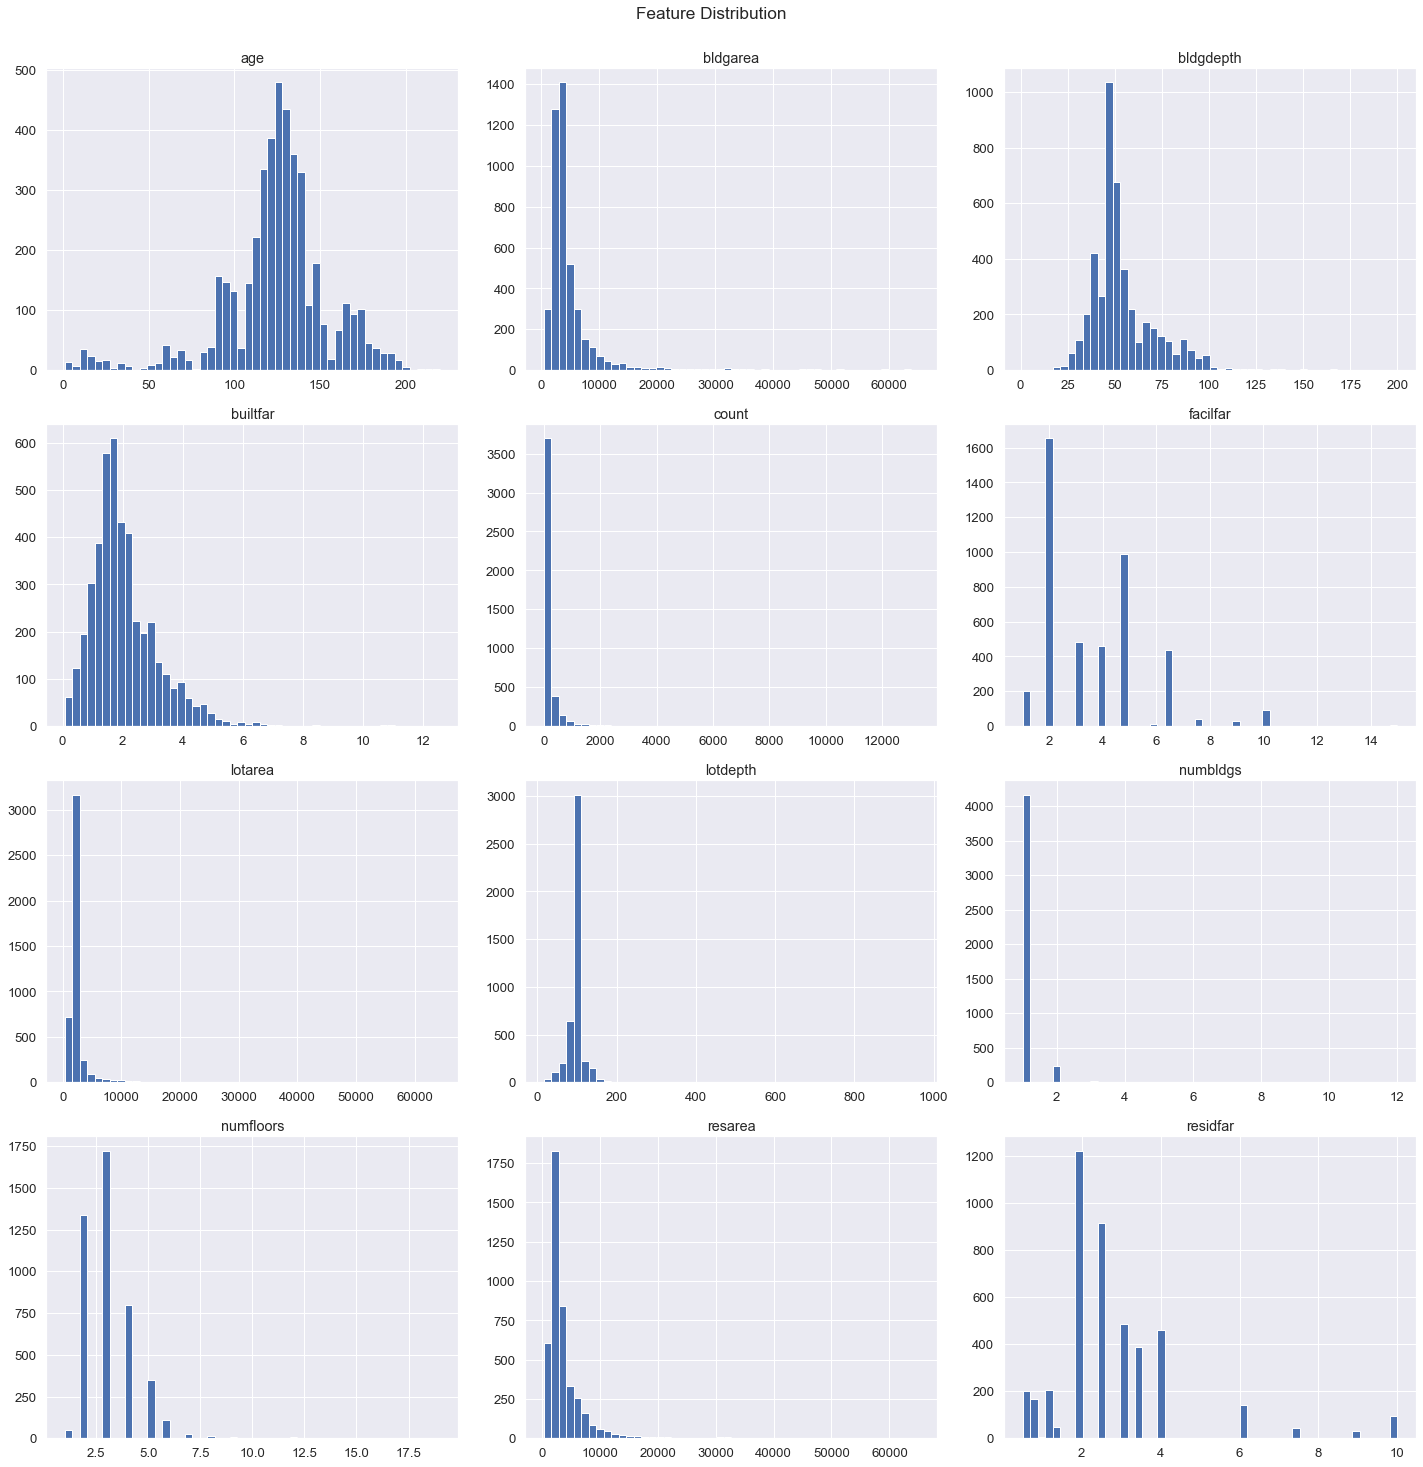

In [140]:
df.hist(bins=50, figsize=(20,20))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

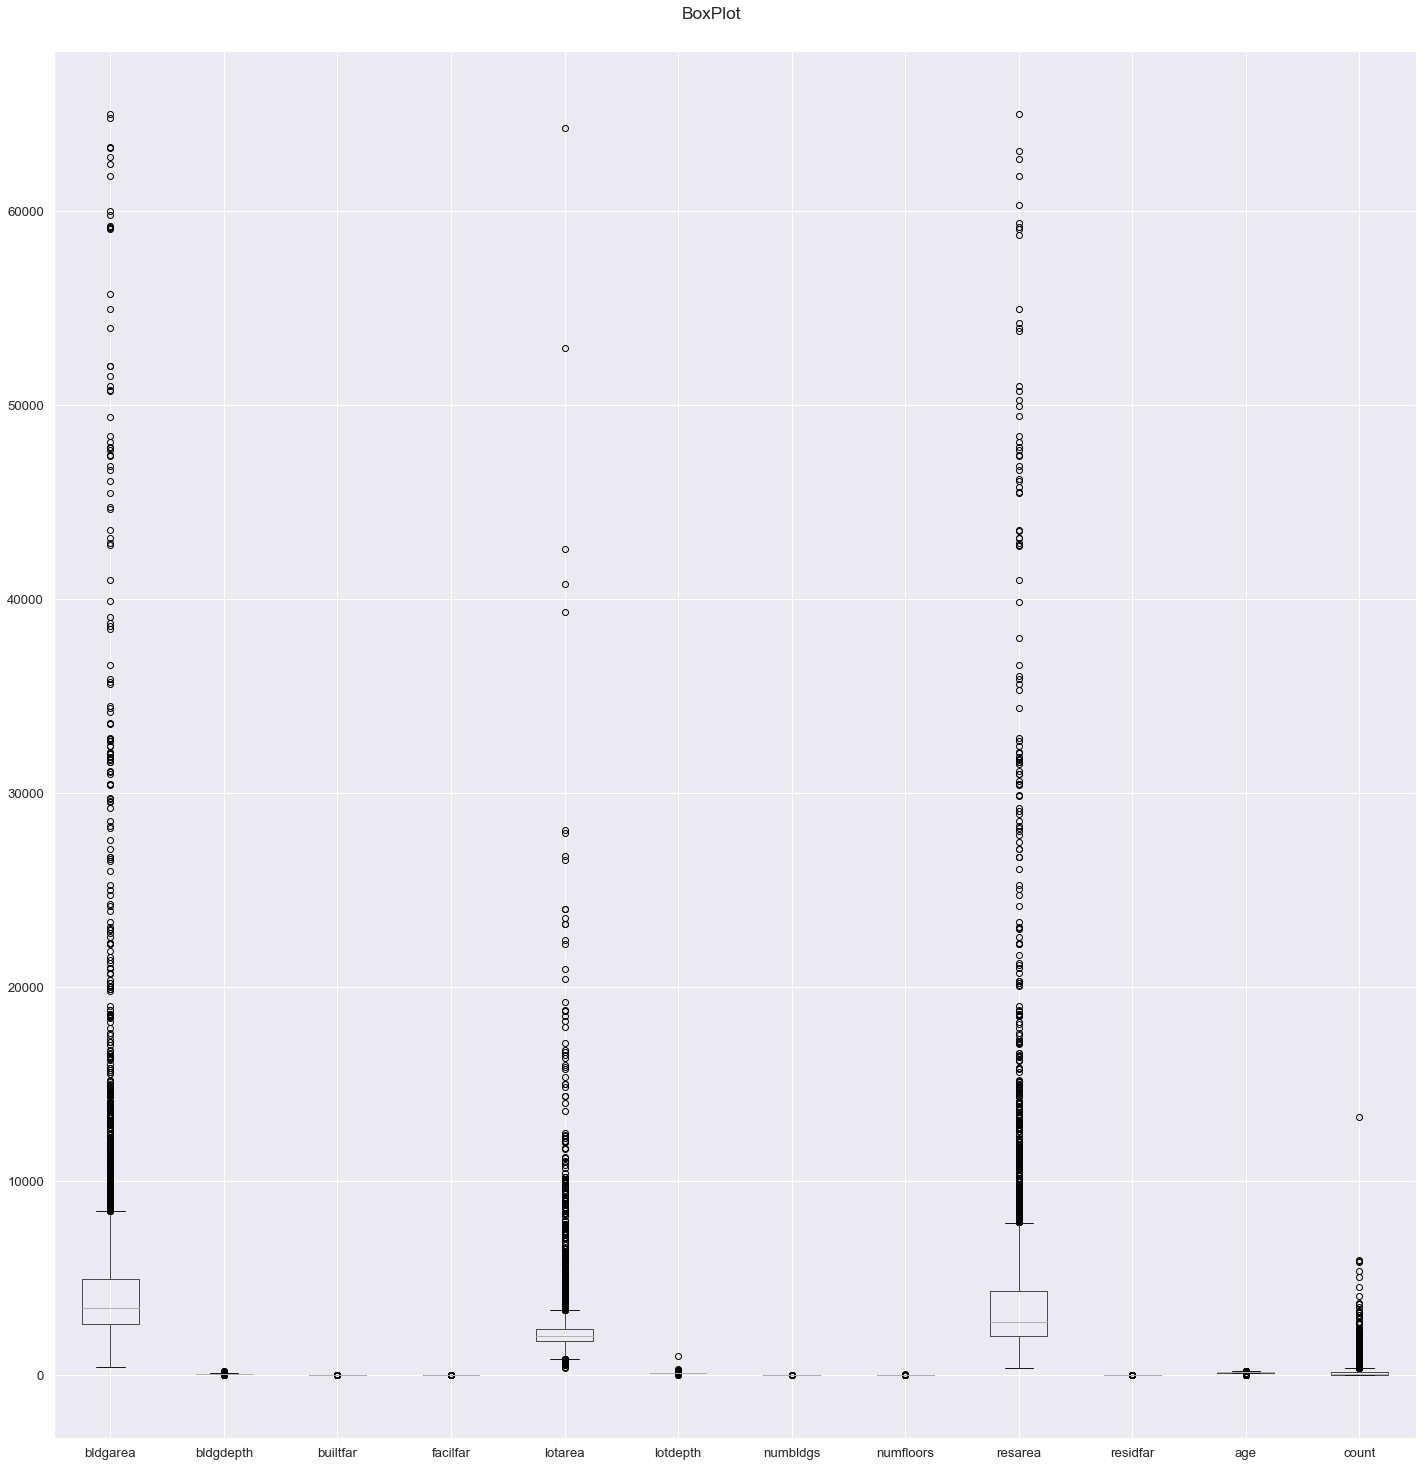

In [141]:
df.boxplot(figsize=(20,20))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

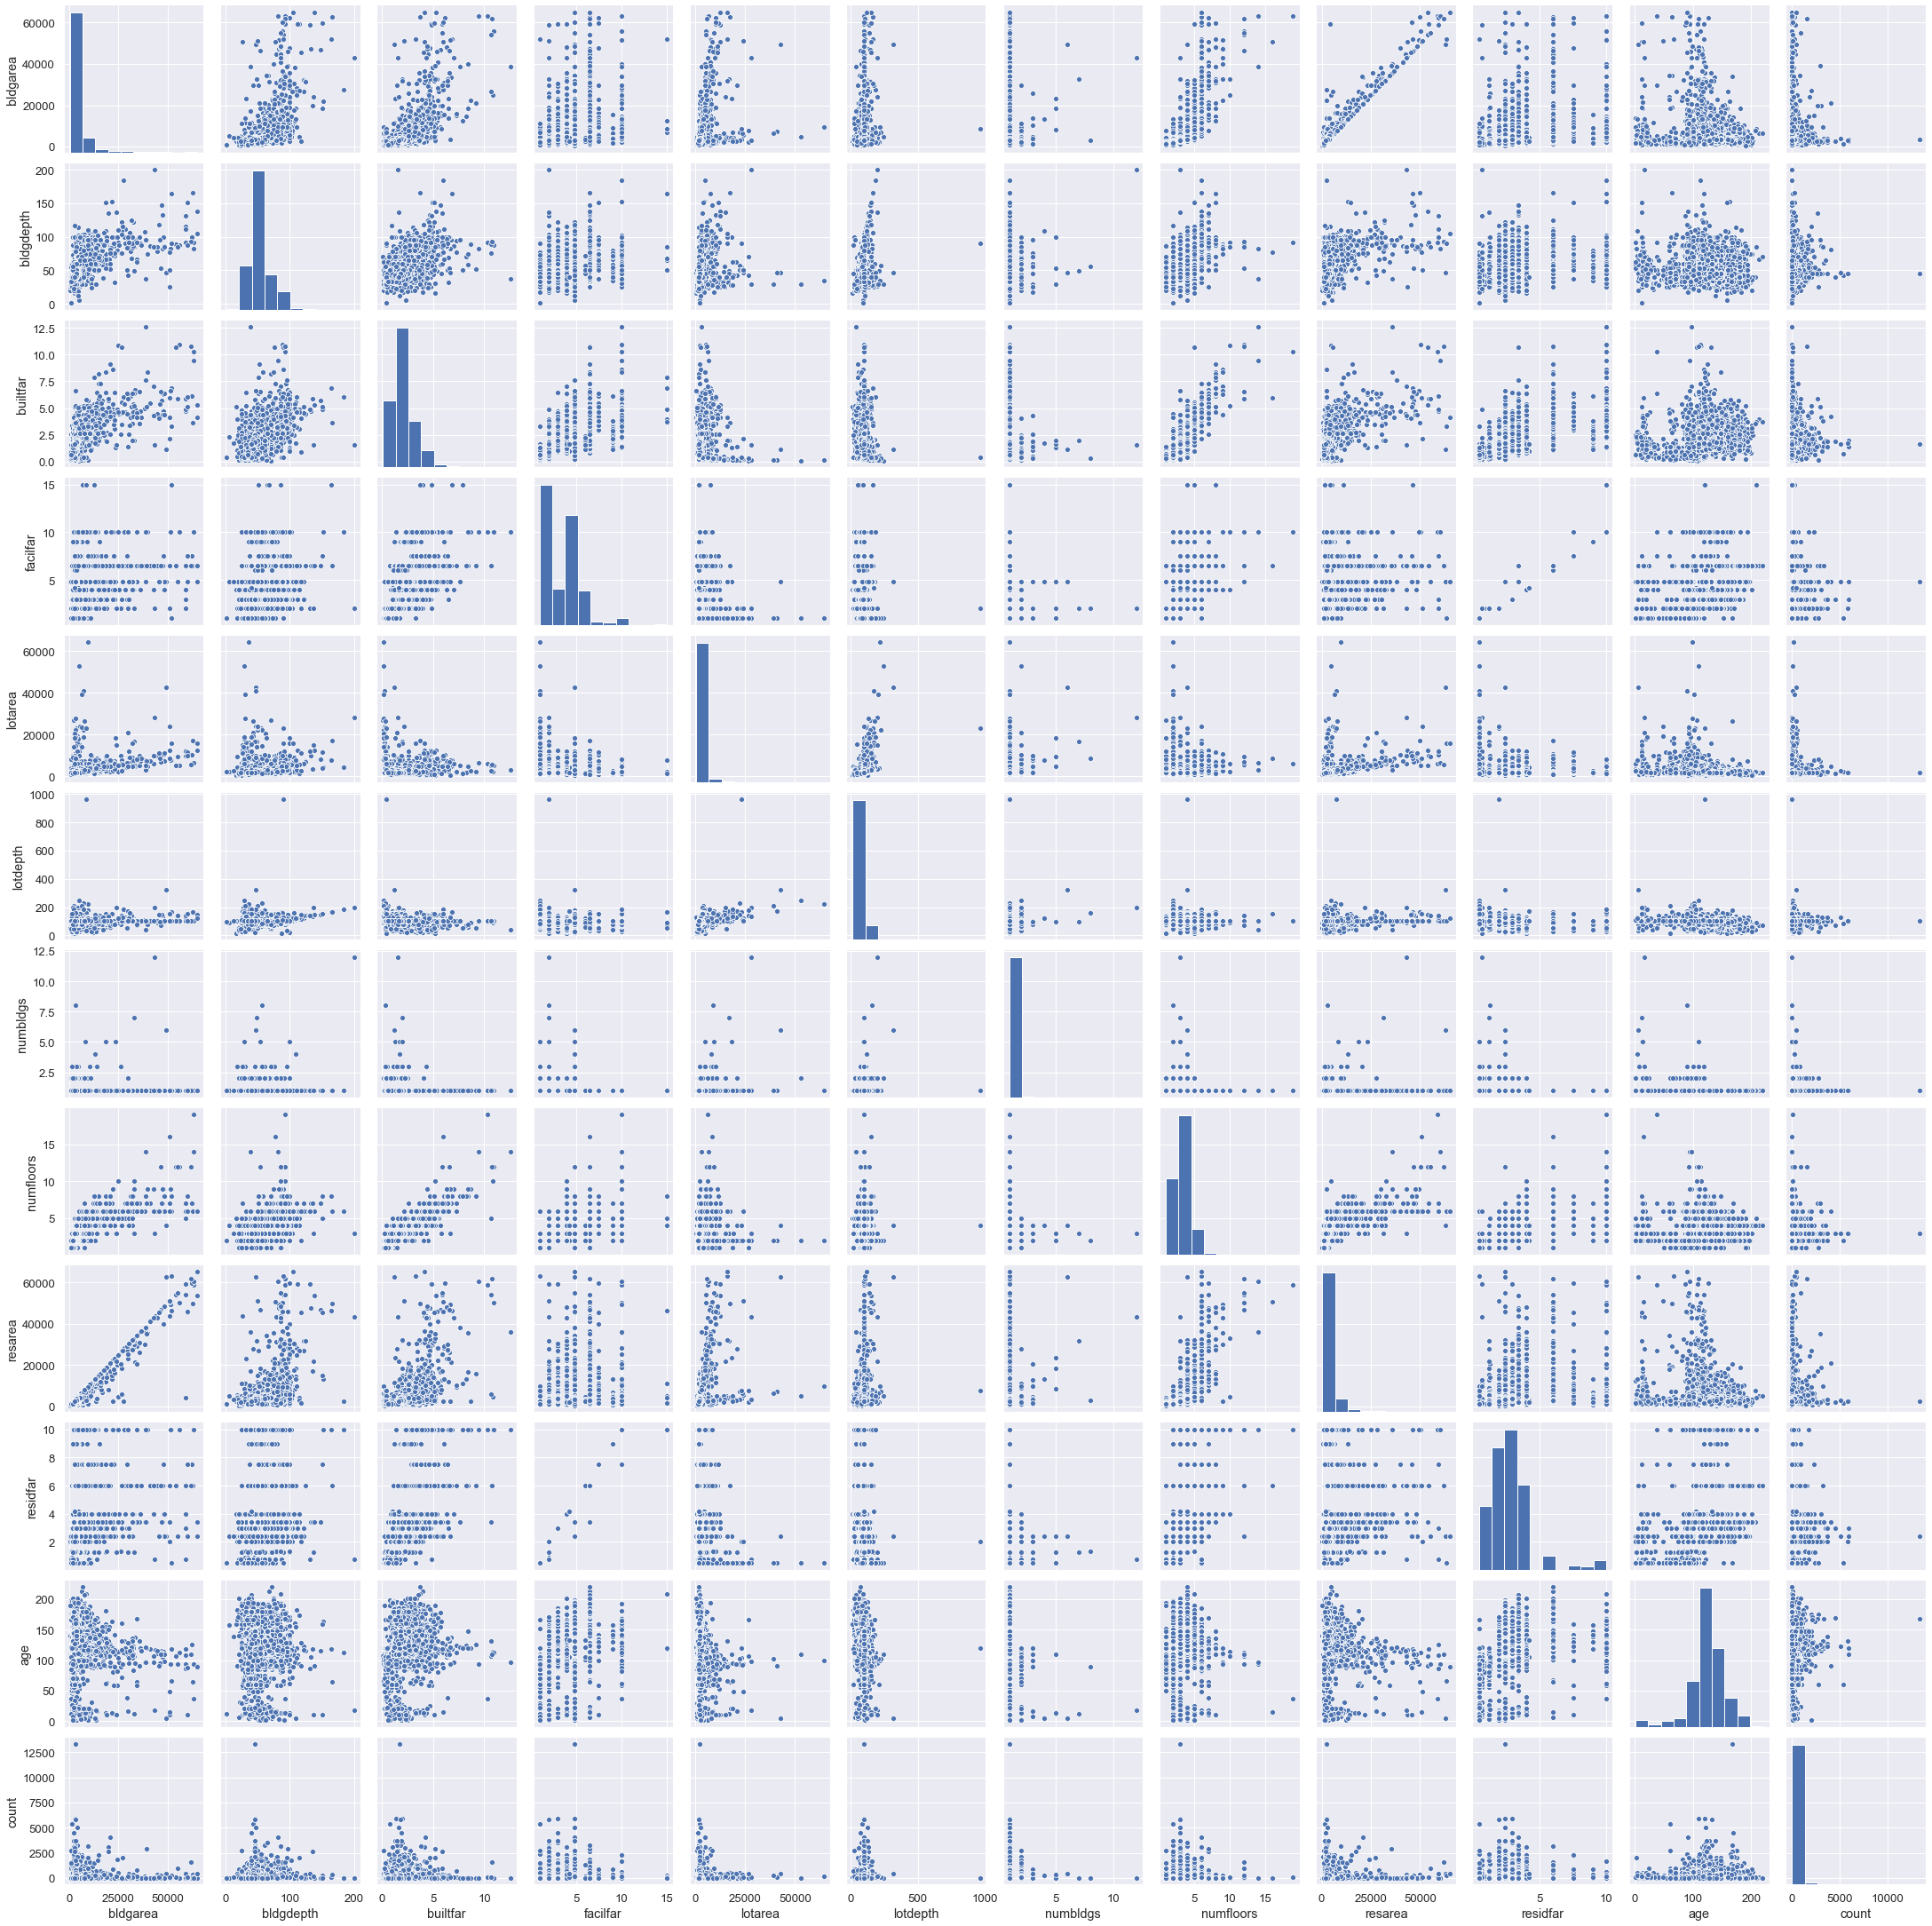

In [142]:
sns.pairplot(df)
plt.show()

### Correlation

In [143]:
df.corr()

,bldgarea,bldgdepth,builtfar,facilfar,lotarea,lotdepth,numbldgs,numfloors,resarea,residfar,age,count
bldgarea,1.000000,0.600010,0.667992,0.315612,0.430118,0.108481,0.041679,0.710543,0.972340,0.350500,-0.106227,0.000434
bldgdepth,0.600010,1.000000,0.601410,0.377690,0.179457,0.185855,0.006507,0.573658,0.578393,0.424995,-0.080635,-0.007808
builtfar,0.667992,0.601410,1.000000,0.562730,-0.028266,-0.217884,-0.183287,0.858705,0.624494,0.644225,0.182794,-0.024527
facilfar,0.315612,0.377690,0.562730,1.000000,-0.081489,-0.172393,-0.153091,0.483941,0.283400,0.822950,0.235240,-0.015298
lotarea,0.430118,0.179457,-0.028266,-0.081489,1.000000,0.428695,0.244392,0.095674,0.442750,-0.092213,-0.252213,0.014890
lotdepth,0.108481,0.185855,-0.217884,-0.172393,0.428695,1.000000,0.105064,-0.046994,0.118403,-0.151556,-0.174989,0.007274
numbldgs,0.041679,0.006507,-0.183287,-0.153091,0.244392,0.105064,1.000000,-0.143564,0.063924,-0.190356,-0.254806,-0.000362
numfloors,0.710543,0.573658,0.858705,0.483941,0.095674,-0.046994,-0.143564,1.000000,0.701476,0.570655,0.111343,-0.016132
resarea,0.972340,0.578393,0.624494,0.283400,0.442750,0.118403,0.063924,0.701476,1.000000,0.310836,-0.124562,0.005414
residfar,0.350500,0.424995,0.644225,0.822950,-0.092213,-0.151556,-0.190356,0.570655,0.310836,1.000000,0.229462,-0.032211


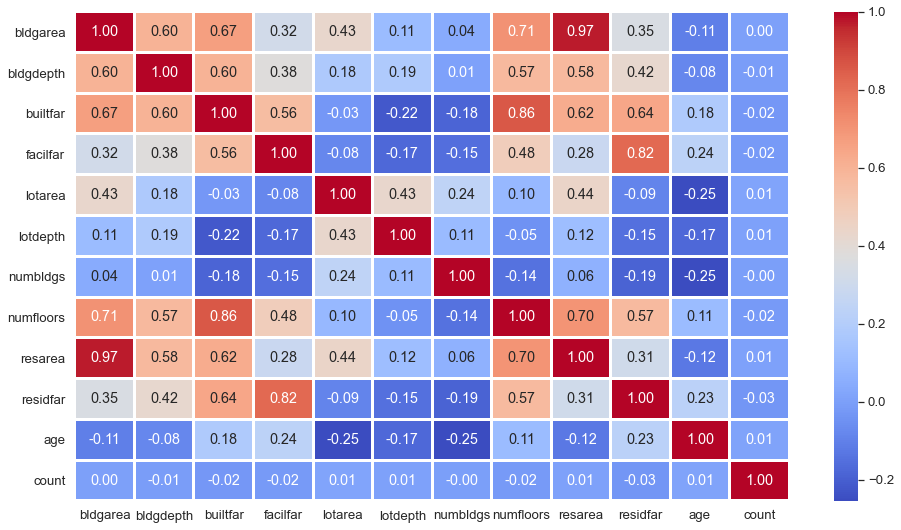

In [144]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()